<a href="https://colab.research.google.com/github/AlexisGuillotin/Bitcoin-Cash-Challenge/blob/main/Daily_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery
import seaborn

Connect to Big Query project

In [2]:
client = bigquery.Client(project='bitcoin-cash-challenge-381520', location='US')
auth.authenticate_user()

In [3]:
query = """
        SELECT
          SUM(input_balance - output_balance) as sum_balance,
          block_date
        FROM `bitcoin-cash-challenge-381520.dbt_aguillotin.DatamartTable_transactions`
        GROUP by block_date
        ORDER by block_date
        """
query_job = client.query(query)
results = query_job.result()

df = pd.DataFrame(results.to_dataframe())
df.head(5)

,sum_balance,block_date
0,2505,2023-02-01
1,379200,2023-02-10
2,374600,2023-02-13
3,133064,2023-02-14
4,8240,2023-02-16


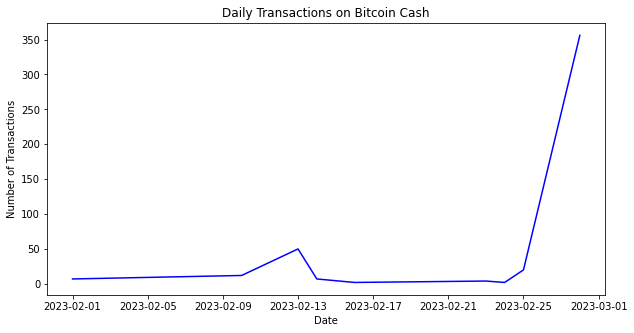

In [5]:
# Query the table and store the results in a pandas dataframe
query = """
SELECT 
  block_date, 
  COUNT(*) as daily_transactions
FROM 
  `bitcoin-cash-challenge-381520.dbt_aguillotin.DatamartTable_transactions`
GROUP BY 
  block_date
ORDER BY 
  block_date ASC
"""
df = client.query(query).to_dataframe()

# Convert block_date column to datetime type
df['block_date'] = pd.to_datetime(df['block_date'])

# Set block_date as the index of the dataframe
df.set_index('block_date', inplace=True)

# Plot the daily transactions on a line chart
plt.figure(figsize=(10,5))
plt.plot(df, color='blue')
plt.title('Daily Transactions on Bitcoin Cash')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()
